In [1]:
from engine.vector_backtest_engine import vector_backtest, vector_backtest_from_factors
from factor_manager.momentum import Momentum
from factor_manager.doubleMA import DoubleMA
import argparse

In [2]:
def get_args_with_batch_id(batch_id):
    parser = argparse.ArgumentParser()
    parser.add_argument("--factor_name", "-m", default="Momentum", help="factor name")
    parser.add_argument("--model_id", type=str, default="equal_weight", help="Model id")
    parser.add_argument("--signal_method", type=str, default="equal_weight", help="equal_weight or prediction in creating signal")
    parser.add_argument("--back_window", type=int, default=60, help="Number of trading days for train data")
    parser.add_argument("--with_pca", type=bool, default=False, help="PCA in model training")
    parser.add_argument("--trade_type", type=str, default='long_only', help="long only or long short in signal evaluation")
    parser.add_argument("--upper_bound", type=float, default=0.8, help="upper bound of signal to weight")
    parser.add_argument("--lower_bound", type=float, default=0.2, help="lower bound of signal to weight")
    parser.add_argument("--target", type=str, default="tag_raw", help="tag_raw or tag_ranked in model prediction")
    args = parser.parse_args()

    if batch_id == 1:
        args.model_id = 'equal_weight'
        args.signal_method = 'equal_weight' 
    elif batch_id == 2:
        args.model_id = 'OLSLRModel'
        args.signal_method = 'prediction'    
        args.with_pca = False
        args.target = 'tag_raw'
    elif batch_id == 3:
        args.model_id = 'OLSLRModel_PCA'
        args.signal_method = 'prediction'
        args.with_pca = True
        args.target = 'tag_raw'
    elif batch_id == 4:
        args.model_id = 'OLSLRModel_tag_ranked'
        args.signal_method = 'prediction' 
        args.with_pca = False
        args.target = 'tag_ranked'  
    elif batch_id == 5:
        args.model_id = 'OLSLRModel_PCA_tag_ranked'
        args.signal_method = 'prediction' 
        args.with_pca = True
        args.target = 'tag_ranked'  
    return args

2023-12-27 17:23:01.873 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2023-12-27 17:23:01.875 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656      1086.303     1102.662
open            996.996      1008.279      1059.141      1075.562      1087.68
high           1021.568      1060.898      1086.694      1095.841     1108.291
low             993.892      1008.279      1059.095       1070.98     1082.509
pre_close        1000.0      1011.347      1060.801      1075.656     1086.303
change           11.347        49.454        14.855        10.647       16.359
pct_chg          1.1347        4.8

2023-12-27 17:23:01.893 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/factors/stock_index/momentum/000016.parquet
2023-12-27 17:23:01.895 | INFO     | data_manager.data_loader:load_data_by_file:16 -                     0         1         2         3         4
trade_date   20040102  20040105  20040106  20040107  20040108
momentum_1   0.011347  0.048899  0.014004  0.009898  0.015059
momentum_5        NaN       NaN       NaN       NaN  0.019841
momentum_10       NaN       NaN       NaN       NaN       NaN
momentum_20       NaN       NaN       NaN       NaN       NaN
momentum_40       NaN       NaN       NaN       NaN       NaN
momentum_60       NaN       NaN       NaN       NaN       NaN


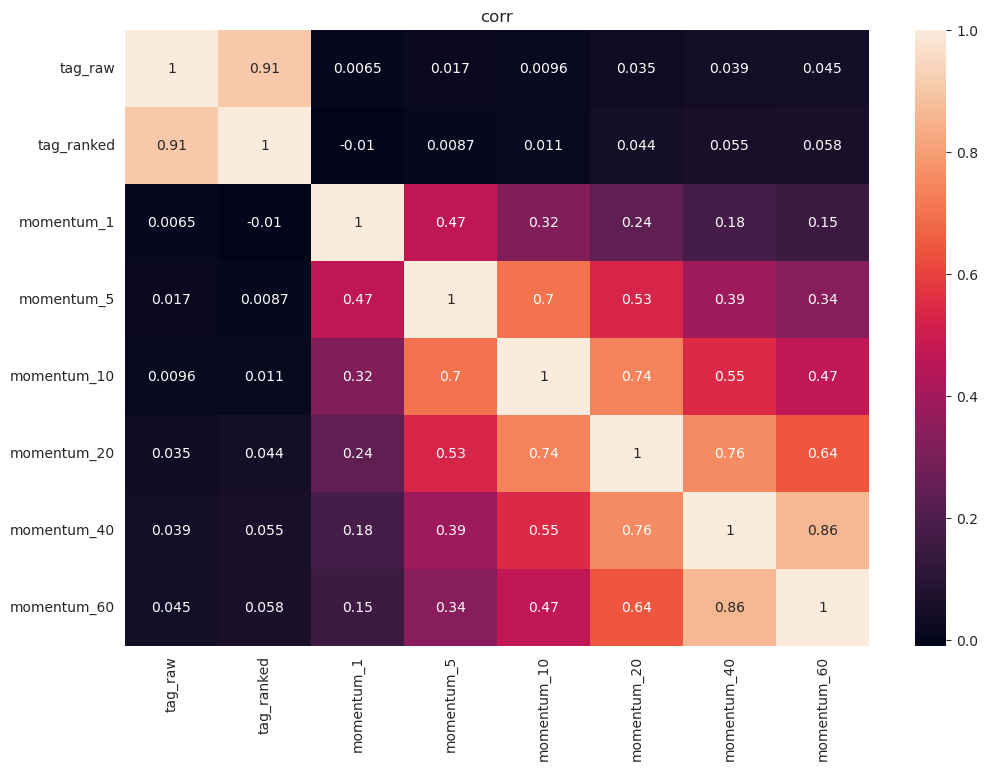

2023-12-27 17:23:02.317 | INFO     | engine.vector_backtest_engine:vector_backtest:127 -                     000016.SH_benchmark  000016.SH_equal_weight
annualized return              0.075339                0.130359
sharpe ratio                   0.291962                0.772595
win ratio                      0.502988                0.529512
win per loss                   1.042277                1.086848
turnover(buy side)                  NaN                0.003708
annualized costs                    NaN                0.000430


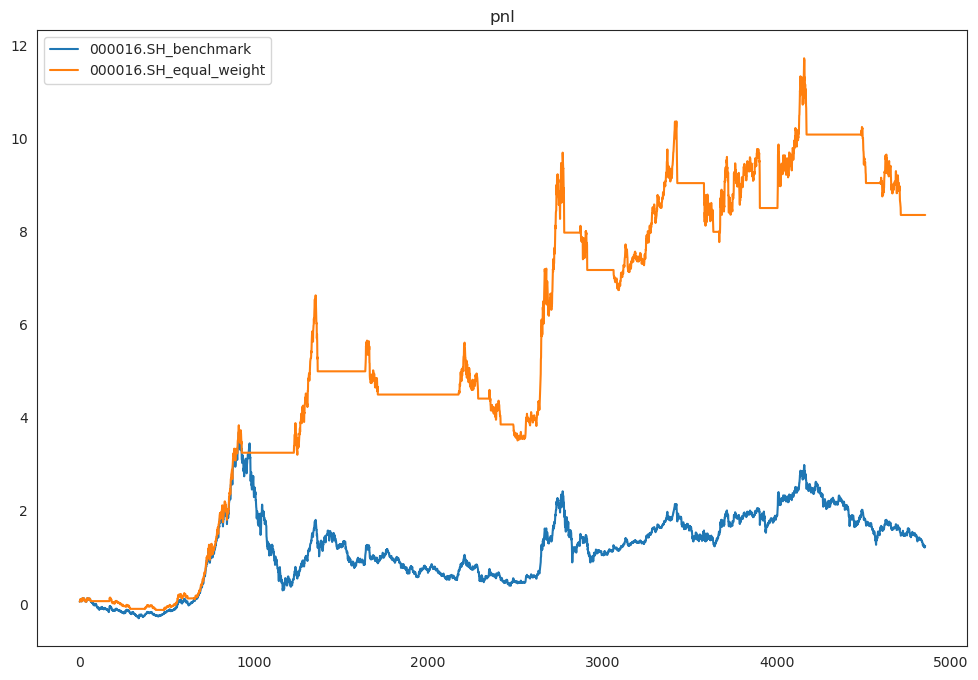

2023-12-27 17:23:02.549 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2023-12-27 17:23:02.550 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656      1086.303     1102.662
open            996.996      1008.279      1059.141      1075.562      1087.68
high           1021.568      1060.898      1086.694      1095.841     1108.291
low             993.892      1008.279      1059.095       1070.98     1082.509
pre_close        1000.0      1011.347      1060.801      1075.656     1086.303
change           11.347        49.454        14.855        10.647       16.359
pct_chg          1.1347        4.8

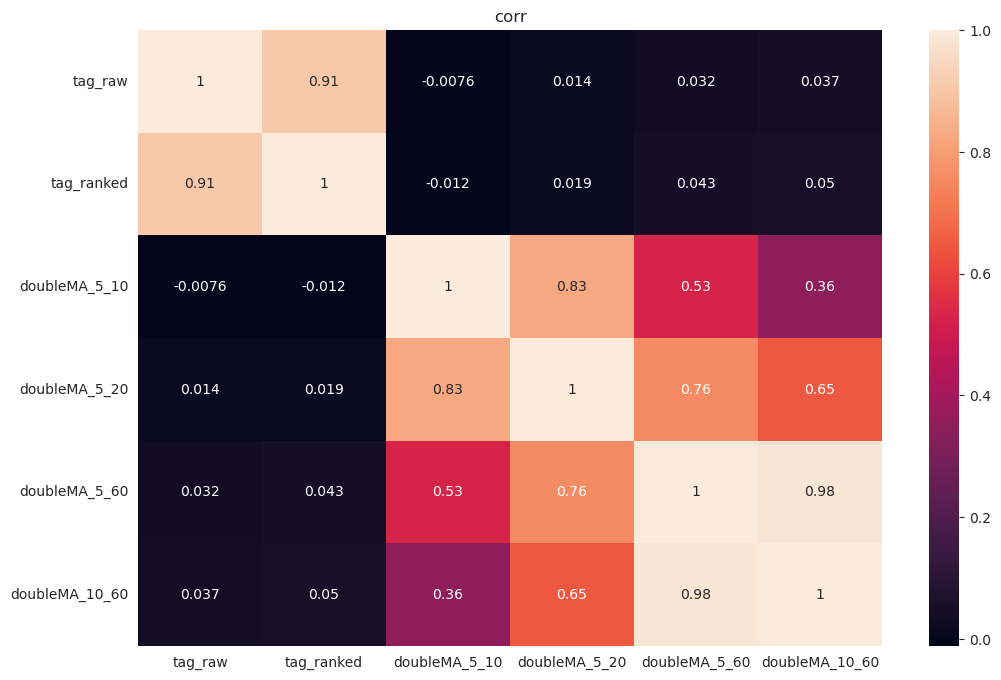

2023-12-27 17:23:02.880 | INFO     | engine.vector_backtest_engine:vector_backtest:127 -                     000016.SH_benchmark  000016.SH_equal_weight
annualized return              0.075339                0.099741
sharpe ratio                   0.291962                0.572829
win ratio                      0.502988                0.523770
win per loss                   1.042277                1.052175
turnover(buy side)                  NaN                0.004737
annualized costs                    NaN                0.000549


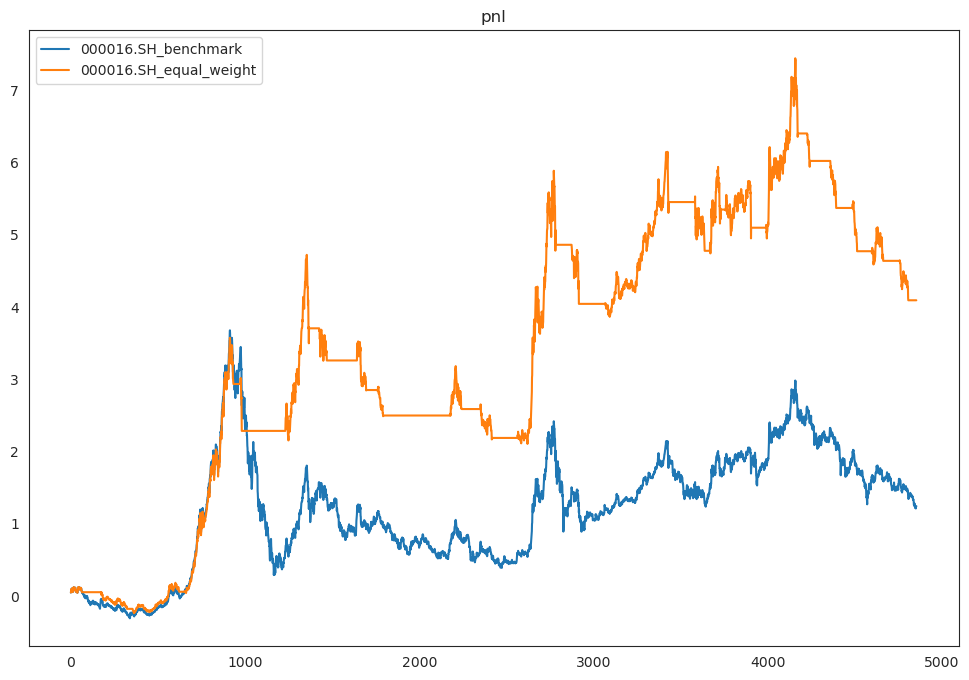

2023-12-27 17:23:03.199 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2023-12-27 17:23:03.201 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656      1086.303     1102.662
open            996.996      1008.279      1059.141      1075.562      1087.68
high           1021.568      1060.898      1086.694      1095.841     1108.291
low             993.892      1008.279      1059.095       1070.98     1082.509
pre_close        1000.0      1011.347      1060.801      1075.656     1086.303
change           11.347        49.454        14.855        10.647       16.359
pct_chg          1.1347        4.8

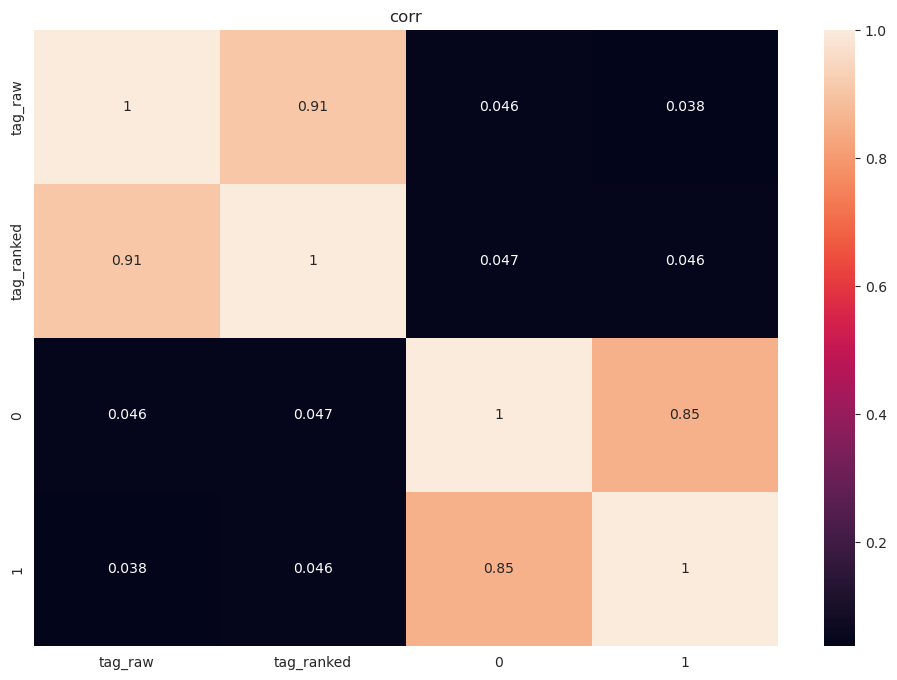

2023-12-27 17:23:03.451 | INFO     | engine.vector_backtest_engine:vector_backtest_from_factors:171 -                     000016.SH_benchmark  000016.SH_equal_weight
annualized return              0.075339                0.106658
sharpe ratio                   0.291962                0.667816
win ratio                      0.502988                0.531011
win per loss                   1.042277                1.062566
turnover(buy side)                  NaN                0.005561
annualized costs                    NaN                0.000645


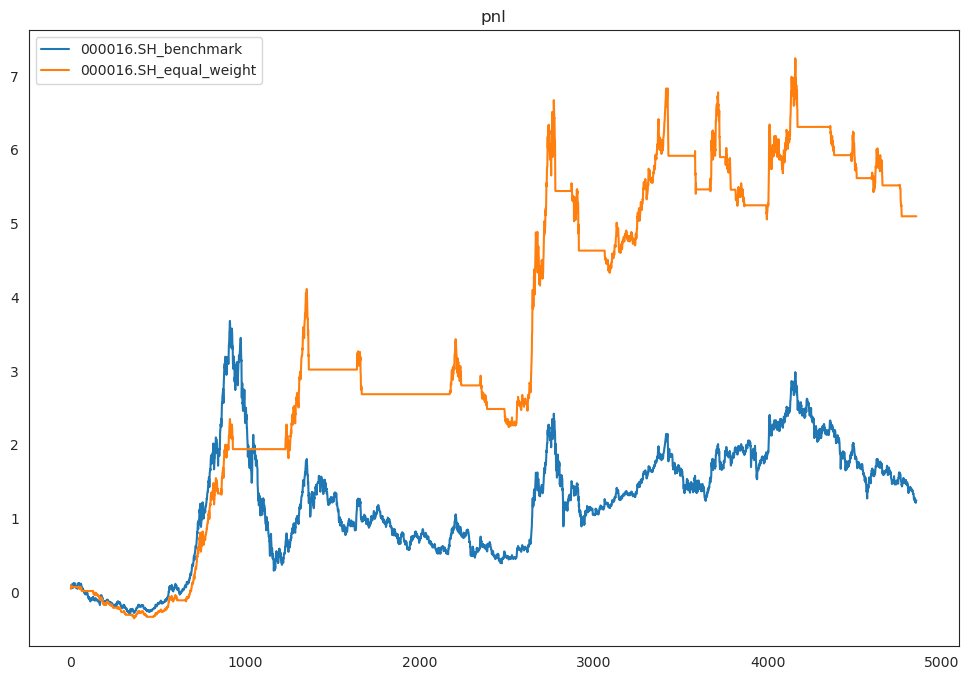

In [3]:
contracts = ['000016.SH', '000300.SH', '000905.SH', '000852.SH']
args_list = [get_args_with_batch_id(batch_id) for batch_id in range(1, 2)]
signal_1 = vector_backtest(Momentum, '000016.SH', args_list)
signal_2 = vector_backtest(DoubleMA, '000016.SH', args_list)
args_list = [get_args_with_batch_id(batch_id) for batch_id in range(1, 2)]
import pandas as pd
df_factors = pd.concat([signal_1, signal_2], axis=1)
vector_backtest_from_factors(Momentum, '000016.SH', args_list, df_factors)